In [36]:
import numpy as np 
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport

import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor


from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier,RandomForestClassifier

In [37]:
url="avocado.csv"

In [38]:
df=pd.read_csv(url,sep=",")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [40]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [39]:
df.dropna(axis=0,inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [42]:
#Changing Data types 
df["Date"]= pd.to_datetime(df["Date"])

In [43]:
print('\n'"Total No of Regions that the Avacado is brought from:",len(df['region'].unique()),end='\n\n')
print(df['region'].unique())
df['region'].value_counts()


Total No of Regions that the Avacado is brought from: 54

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


PhoenixTucson          338
SanFrancisco           338
Midsouth               338
Atlanta                338
LosAngeles             338
SouthCarolina          338
RaleighGreensboro      338
HarrisburgScranton     338
Portland               338
Sacramento             338
Boise                  338
Southeast              338
Plains                 338
Indianapolis           338
NorthernNewEngland     338
Columbus               338
DallasFtWorth          338
GrandRapids            338
TotalUS                338
CincinnatiDayton       338
BaltimoreWashington    338
Detroit                338
HartfordSpringfield    338
Northeast              338
SouthCentral           338
StLouis                338
NewYork                338
Syracuse               338
MiamiFtLauderdale      338
Nashville              338
Roanoke                338
Tampa                  338
Jacksonville           338
Charlotte              338
Boston                 338
Seattle                338
SanDiego               338
L

In [44]:
df[df["region"]== "TotalUS"]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2652,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS
2653,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS
2654,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS
2655,2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS
2656,2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18220,2018-02-04,1.53,1384683.41,117922.52,287724.61,1703.52,977084.84,774695.74,201878.69,510.41,organic,2018,TotalUS
18221,2018-01-28,1.61,1336979.09,118616.17,280080.34,1270.61,936859.49,796104.27,140652.84,102.38,organic,2018,TotalUS
18222,2018-01-21,1.63,1283987.65,108705.28,259172.13,1490.02,914409.26,710654.40,203526.59,228.27,organic,2018,TotalUS
18223,2018-01-14,1.59,1476651.08,145680.62,323669.83,1580.01,1005593.78,858772.69,146808.97,12.12,organic,2018,TotalUS


In [45]:
#"Total US" gives a wrong measue of the data, as it sums up the data so it is better to dropped 
df.drop(df[df['region'] == "TotalUS"].index, inplace = True) 
# Print the shape of the dataframe 
print(df.shape)

(17911, 13)


From the availabe Data we can understand the follwing

The dataset contains the data of Years 2015 and 2016

This Data is Recoreded from 2015-01-02 - 2016-12-25

AveragePrice of Avacados range between 0.49$-1.68\$

Total Volume sold range between 38K - 1,03,6170

Total Bags range between 3K - 3,05,611

In [46]:
df.drop("type",axis=1,inplace=True)

In [47]:
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


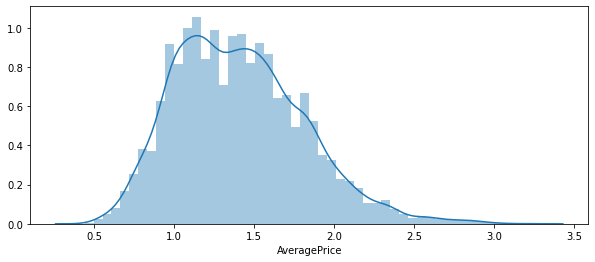

In [48]:
#Eda
plt.subplots(figsize=(10,4))
sns.distplot(df.AveragePrice)
plt.show()

In [49]:
print("Skewness: %f" % df['AveragePrice'].skew())

Skewness: 0.577132


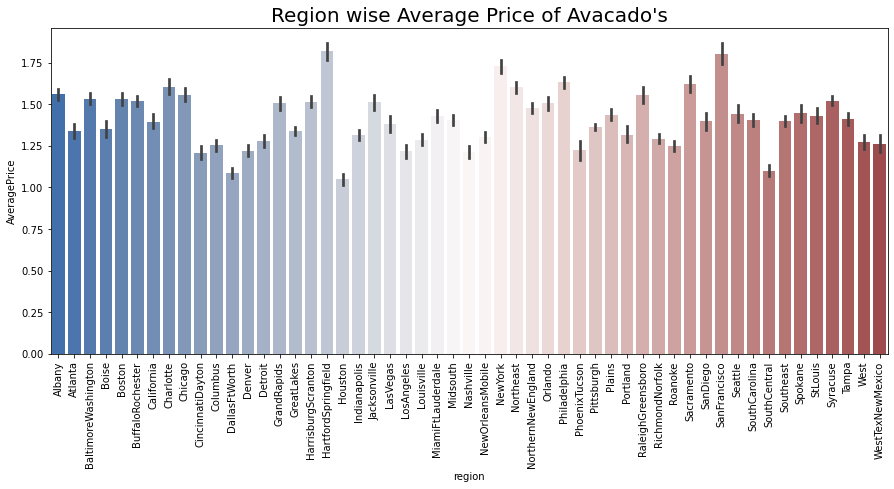

In [50]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'region', y = 'AveragePrice', data = df, palette = 'vlag')
plt.xticks(rotation = 90)
plt.title("Region wise Average Price of Avacado's", fontsize = 20)
plt.show()


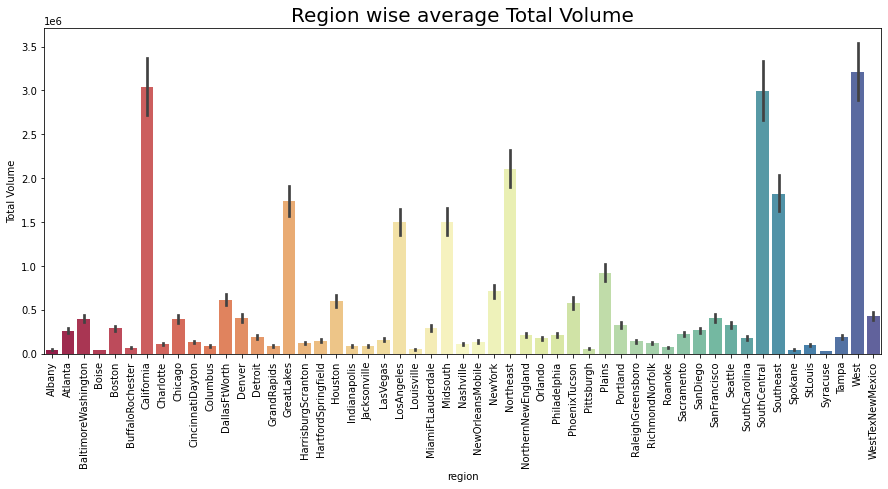

In [51]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'region', y = 'Total Volume', data = df, palette = 'Spectral')
plt.xticks(rotation = 90)
plt.title('Region wise average Total Volume', fontsize = 20)
plt.show()

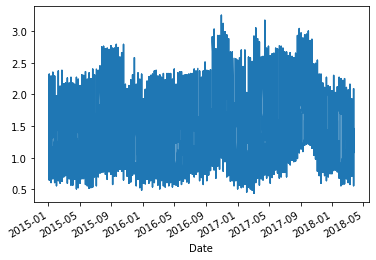

In [52]:
df.set_index("Date",inplace=True)
df["AveragePrice"].plot()

In [53]:
#To better understand the data we should change the region data using label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[["region"]] = df[["region"]].apply(le.fit_transform)

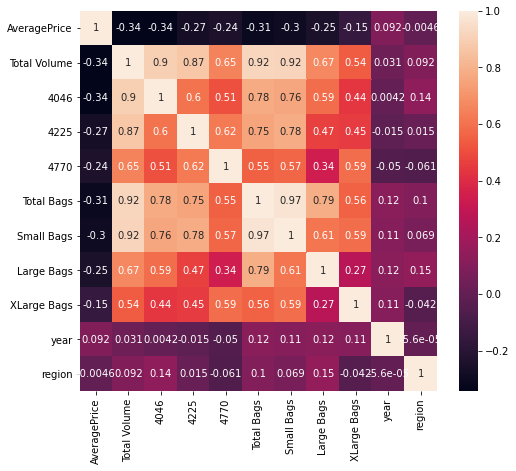

In [54]:
corr_hmap= df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

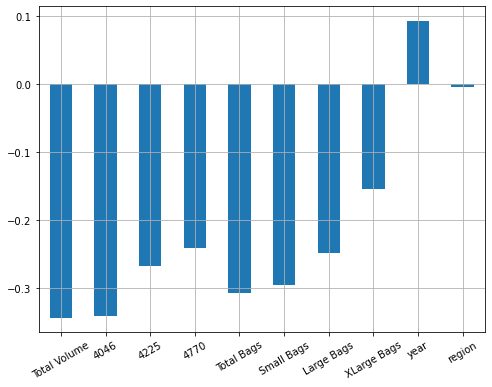

In [55]:
plt.figure(figsize=(8,6))
df.drop("AveragePrice",axis=1).corrwith(df["AveragePrice"]).plot(kind="bar",grid=True)
plt.xticks(rotation=30)
plt.show()

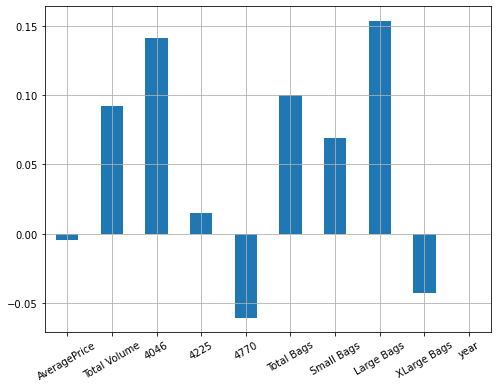

In [26]:
plt.figure(figsize=(8,6))
df.drop("region",axis=1).corrwith(df["region"]).plot(kind="bar",grid=True)
plt.xticks(rotation=30)
plt.show()

EDA Concluding Remarks

Pre-processing Pipeline

In [56]:
#To better understand the data we should change the region data using label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[["region"]] = df[["region"]].apply(le.fit_transform)

In [57]:
y=df["AveragePrice"]
x=df.drop("AveragePrice", axis=1)

In [30]:
df.drop("type",axis=1,inplace=True)

In [115]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lr=LinearRegression()
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [116]:
max_scr=0
for i in range(30,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i,"The model Perfomes very well")
        print("Training r2_score is:",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:",r2_score(y_test,pred_test)*100)

At random state 239 The model Perfomes very well
Training r2_score is: 13.930469263968149
Testing r2_score is: 13.92680072800444
At random state 545 The model Perfomes very well
Training r2_score is: 13.918227686998797
Testing r2_score is: 13.922823733059086
At random state 648 The model Perfomes very well
Training r2_score is: 13.91748061206326
Testing r2_score is: 13.917972605253837
At random state 650 The model Perfomes very well
Training r2_score is: 13.930998075782309
Testing r2_score is: 13.933765855632096
At random state 667 The model Perfomes very well
Training r2_score is: 13.92827874561825
Testing r2_score is: 13.927626857040632
At random state 691 The model Perfomes very well
Training r2_score is: 13.932092575936094
Testing r2_score is: 13.927248672508242
At random state 930 The model Perfomes very well
Training r2_score is: 13.9255838886859
Testing r2_score is: 13.93094164661689


In [117]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=477)
num_folds = 10
seed = 239
scoring = 'neg_mean_squared_error'

Model building

In [118]:
models= [
    ("Lasso",Lasso()),
    ("Linear Regression",LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Ridge Regression",Ridge()),
    ("KNearest Neighbors",KNeighborsRegressor(3)),
    ("SVR",SVR()),
    ("RandomForestRegressor",RandomForestRegressor())
    ]

In [119]:
results = []
names = []
for name, model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    R2 = r2_score(y_test,y_pred)
    results.append(R2)
    names.append(name)
    msg = "R2 Score with ""%s: %f " % (name, R2)
    print(msg)

R2 Score with Lasso: -0.000001 
R2 Score with Linear Regression: 0.133031 
R2 Score with Decision Tree: 0.717615 
R2 Score with Ridge Regression: 0.133054 
R2 Score with KNearest Neighbors: 0.851749 
R2 Score with SVR: 0.482407 
R2 Score with RandomForestRegressor: 0.852401 


In [53]:
#RandomForest and KNearest gives highest accuracy with 85%

In [120]:
# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = KNeighborsRegressor()
n_neighbors = range(1, 13, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

clf=GridSearchCV(model,grid)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [123]:
KNN= KNeighborsRegressor(metric= 'manhattan', n_neighbors= 5, weights= 'distance')
KNN.fit(x_train,y_train)
KNN.score(x_train,y_train)
y_pred = KNN.predict(x_test)

KNNs = r2_score(y_test,y_pred)
print("r2 score is :",KNNs*100)

KNNscore=cross_val_score(KNN,x_t,y,cv=3)
KNNc=KNNscore.mean()
print("Cross value Score:",KNNc)

r2 score is : 86.70672311845621
Cross value Score: -0.7960449595473725


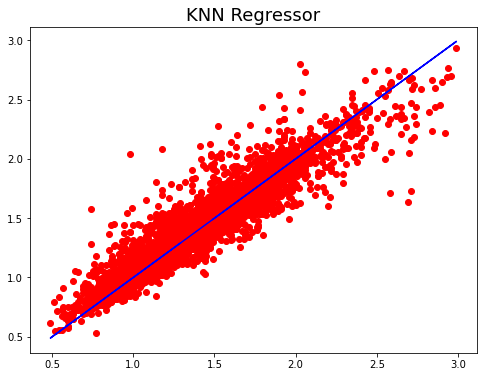

In [128]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("KNN Regressor",fontsize=18)
plt.show()

In [129]:
model=RandomForestRegressor()

In [130]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

In [131]:
n_estimators= [10,20,30]
max_features= [5, 10]
max_depth= [10,20,30] 
bootstrap = [True, False]
criterion= ["mse", "mae"]
    
grid = dict(n_estimators=n_estimators,max_depth=max_depth, criterion=criterion)  

In [132]:
clf=GridSearchCV(model,grid)

In [ ]:
clf.fit(x_train,y_train)

In [134]:
rf = RandomForestRegressor(criterion = 'mse', max_depth = 20, n_estimators=30)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
y_predrf = rf.predict(x_test)

rfs = r2_score(y_test,y_predrf)
print("r2 score is :",rfs*100)

rfscore=cross_val_score(rf,x_t,y,cv=3)
rfc=rfscore.mean()
print("Cross value Score:",rfc)

r2 score is : 84.77213007221143
Cross value Score: -0.13783877698695415


In [ ]:
#KNN Algorithm

KNN Mean Absolute Error: 0.1

KNN Mean Squared Error: 0.02

KNN R^2 Score: 86.45

KNN Cross val Score: -0.118



In [135]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
#score variables
rf_MAE = round(MAE(y_test, y_pred),2)
rf_MSE = round(MSE(y_test, y_pred),2)
rf_R_2 = round(r2_score(y_test, y_pred),4)
rf_CS  = round(cross_val_score(rf,x_t,y,cv=3).mean(),4)

print(f"KNN Mean Absolute Error: {rf_MAE}\n")
print(f"KNN Mean Squared Error: {rf_MSE}\n")
print(f"KNN R^2 Score: {rf_R_2*100}\n")
print(f"KNN Cross val Score: {rf_CS}\n")

KNN Mean Absolute Error: 0.1

KNN Mean Squared Error: 0.02

KNN R^2 Score: 86.71

KNN Cross val Score: -0.1326



In [136]:
rf_MAE = round(MAE(y_test, y_predrf),2)
rf_MSE = round(MSE(y_test, y_predrf),2)
rf_R_2 = round(r2_score(y_test,y_predrf),4)
rf_CS  = round(cross_val_score(rf,x_t,y,cv=3).mean(),4)

print(f"RFR Mean Absolute Error: {rf_MAE}\n")
print(f"RFR Mean Squared Error: {rf_MSE}\n")
print(f"RFR R^2 Score: {rf_R_2*100}\n")
print(f"RFR Cross val Score: {rf_CS}\n")

RFR Mean Absolute Error: 0.11

RFR Mean Squared Error: 0.03

RFR R^2 Score: 84.77

RFR Cross val Score: -0.1288



In [114]:
models= [AdaBoostRegressor(), ExtraTreesRegressor(), GradientBoostingRegressor()]
names = []

for m in models:
    m.fit(x_train, y_train)
    m.score(x_train, y_train)
    predm = m.predict(x_test)
    names.append(m)
    msg = "%s:" % (names)
    print(msg)
    print(r2_score(y_test, predm)) 
    print(cross_val_score(rf,x_t,y,cv=3).mean(),4)
    print("****************************************************************")
    print("\n")

[AdaBoostRegressor()]:
0.10233215631838466
0.9992688804347843 4
****************************************************************


[AdaBoostRegressor(), ExtraTreesRegressor()]:
0.8205096053884606
0.9992293713504198 4
****************************************************************


[AdaBoostRegressor(), ExtraTreesRegressor(), GradientBoostingRegressor()]:
0.38377202499890084
0.9993546085389075 4
****************************************************************




In [78]:
from sklearn.ensemble import AdaBoostRegressor
#Creating AdaBoost Regressor 
ad=AdaBoostRegressor(n_estimators=50,base_estimator=KNN)
ad.fit(x_train,y_train)

ad_pred= ad.predict(x_test)
ABs = r2_score(y_test,ad_pred)
print("r2 score is :",ABs*100)

ABscore=cross_val_score(ad,x_t,y,cv=3)
ABc=ABscore.mean()
print("Cross value Score:",ABc)

r2 score is : 84.42120042441455
Cross value Score: -0.7919437580655299


In [79]:
Ad_MAE = round(MAE(y_test, ad_pred),2)
Ad_MSE = round(MSE(y_test, ad_pred),2)
Ad_R_2 = round(r2_score(y_test, ad_pred),4)
Ad_CS  = round(cross_val_score(ad,x_t,y,cv=3).mean(),4)

print(f"AB Mean Absolute Error: {Ad_MAE}\n")
print(f"AB Mean Squared Error: {Ad_MSE}\n")
print(f"AB R^2 Score: {Ad_R_2*100}\n")
print(f"AB val Score: {Ad_CS}\n")

AB Mean Absolute Error: 0.1

AB Mean Squared Error: 0.03

AB R^2 Score: 84.42

AB val Score: -0.7933



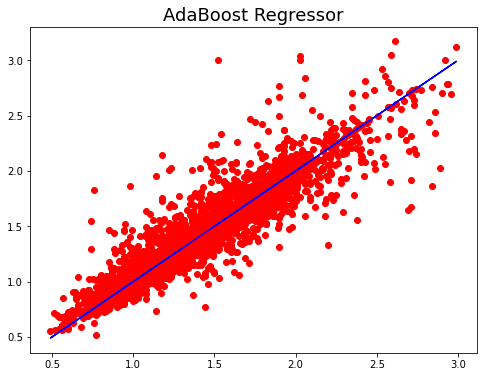

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=ad_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("AdaBoost Regressor",fontsize=18)
plt.show()

In [81]:
ETR=ExtraTreesRegressor(n_estimators=100)
ETR.fit(x_train,y_train)

ETR_pred= ETR.predict(x_test)
ETRs = r2_score(y_test,ETR_pred)
print("r2 score is :",ETRs*100)

ETRscore=cross_val_score(ETR,x_t,y,cv=3)
ETRc=ETRscore.mean()
print("Cross value Score:",ETRc)

r2 score is : 87.38385047821701
Cross value Score: -0.17261688286885316


In [82]:
ETR_MAE = round(MAE(y_test, ETR_pred),2)
ETR_MSE = round(MSE(y_test, ETR_pred),2)
ETR_R_2 = round(r2_score(y_test, ETR_pred),4)
ETR_CS  = round(cross_val_score(ETR,x_t,y,cv=3).mean(),4)

print(f"ETR Mean Absolute Error: {ETR_MAE}\n")
print(f"ETR Mean Squared Error: {ETR_MSE}\n")
print(f"ETR R^2 Score: {ETR_R_2*100}\n")
print(f"ETR val Score: {ETR_CS}\n")

ETR Mean Absolute Error: 0.1

ETR Mean Squared Error: 0.02

ETR R^2 Score: 87.38

ETR val Score: -0.205



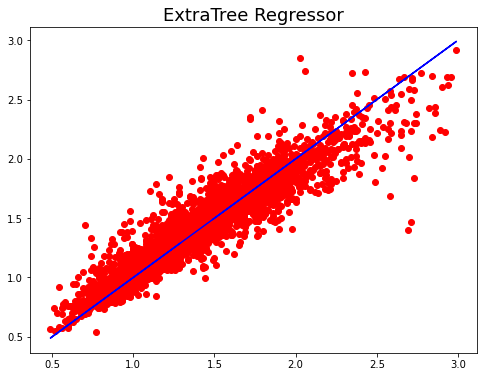

In [83]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=ETR_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("ExtraTree Regressor",fontsize=18)
plt.show()

In [84]:
model= ExtraTreesRegressor(n_estimators=100)
model.fit(x_train, y_train)

ExtraTreesRegressor()

In [85]:
df_pred=pd.DataFrame({"Original":y_test,"Predicted":ETR_pred})
df_pred

,Original,Predicted
Date,,
2016-07-17,1.49,1.4547
2017-07-30,1.63,1.7160
2015-03-08,1.17,1.1719
2015-03-15,1.33,1.3179
2015-04-05,1.91,1.9019
...,...,...
2016-02-28,0.80,0.8787
2016-12-11,1.52,1.4647
2017-10-29,1.81,1.6991


In [86]:
import joblib
joblib.dump(model,"AvacadoPrice.pkl")

['AvacadoPrice.pkl']

In [87]:
y_r=df["region"]
x_r=df.drop("region", axis=1)

In [88]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x_r)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lr=LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [89]:
max_scr=0
for i in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y_r,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,2)>=round(accuracy_score(y_test,pred_test)*100,2):
        print("At random state",i,"The model Perfomes very well")
        print("Training accuracy_score is:",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:",accuracy_score(y_test,pred_test), end = "\n\n\n")

At random state 30 The model Perfomes very well
Training accuracy_score is: 30.534617532104967
Testing accuracy_score is: 0.2813284956740162


At random state 31 The model Perfomes very well
Training accuracy_score is: 30.011166945840312
Testing accuracy_score is: 0.28691041027072284


At random state 32 The model Perfomes very well
Training accuracy_score is: 30.40898939140145
Testing accuracy_score is: 0.2874686017303935


At random state 33 The model Perfomes very well
Training accuracy_score is: 30.1856504745952
Testing accuracy_score is: 0.2944459949762769


At random state 34 The model Perfomes very well
Training accuracy_score is: 30.506700167504185
Testing accuracy_score is: 0.28272397432319285


At random state 35 The model Perfomes very well
Training accuracy_score is: 30.597431602456727
Testing accuracy_score is: 0.26904828356126154


At random state 36 The model Perfomes very well
Training accuracy_score is: 30.346175321049696
Testing accuracy_score is: 0.2975160480044655



At random state 99 The model Perfomes very well
Training accuracy_score is: 29.99022892238973
Testing accuracy_score is: 0.2910968462182529




In [97]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y_r,test_size=.20,random_state=31)  
num_folds = 10
seed = 31
scoring = 'accuracy'

In [98]:
models= [
    ("SVC",SVC()),
    ("Logistic Regression",LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Naive Bayes",GaussianNB()),
    ("KNearest Neighbors",KNeighborsClassifier(3)),
    ("RandomForestClassifier",RandomForestClassifier())
    ]

In [101]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=31,shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SVC: 0.336198 (0.015470)
Logistic Regression: 0.288108 (0.011788)
Decision Tree: 0.792923 (0.008183)
Naive Bayes: 0.310651 (0.008917)
KNearest Neighbors: 0.568397 (0.010399)
RandomForestClassifier: 0.901521 (0.006072)


In [102]:
#we have achived a accuracy score of 90.1%

In [103]:
#hypertuning

In [105]:
#define models and parameters
n_estimators = [10, 100]
max_features = ['sqrt', 'log2']
param_grid = dict(n_estimators=n_estimators,max_features=max_features)
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=7,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)

In [106]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.902360 using {'max_features': 'sqrt', 'n_estimators': 100}
#3 0.866626 (0.012257) with: {'max_features': 'sqrt', 'n_estimators': 10}
#1 0.902360 (0.010985) with: {'max_features': 'sqrt', 'n_estimators': 100}
#4 0.864043 (0.007896) with: {'max_features': 'log2', 'n_estimators': 10}
#2 0.899567 (0.009817) with: {'max_features': 'log2', 'n_estimators': 100}


In [107]:
#model is performing best at #1 0.902360 (0.010985) with: {'max_features': 'sqrt', 'n_estimators': 100}

In [108]:
#Boosting Techniques

In [109]:
models= [AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
names = []

for m in models:
    m.fit(x_train, y_train)
    m.score(x_train, y_train)
    predm = m.predict(x_test)
    names.append(m)
    msg = "%s:" % (names)
    print(msg)
    print(accuracy_score(y_test, predm)) 
    print(confusion_matrix(y_test, predm))
    print("****************************************************************")
    print("\n")

[AdaBoostClassifier()]:
0.06754116662015071
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ... 28  0  0]
 [ 0  0  0 ...  1  0  0]
 ...
 [ 0  0  0 ... 22  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  7  0 32]]
****************************************************************


[AdaBoostClassifier(), GradientBoostingClassifier()]:
0.8291934133407759
[[46  0  0 ...  0  0  0]
 [ 0 47  0 ...  2  0  0]
 [ 0  0 62 ...  0  0  0]
 ...
 [ 0  1  0 ... 40  0  0]
 [ 0  0  0 ...  0 65  0]
 [ 0  1  1 ...  0  0 58]]
****************************************************************


[AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier()]:
0.8576611777839799
[[45  0  0 ...  0  0  0]
 [ 0 54  0 ...  0  0  0]
 [ 0  0 64 ...  0  0  0]
 ...
 [ 0  1  0 ... 37  0  0]
 [ 0  0  0 ...  0 65  0]
 [ 1  1  1 ...  0  0 56]]
****************************************************************


[AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier()]:
0.908735696343846
[[4

In [110]:
model = ExtraTreesClassifier(n_estimators=100)
model.fit(x_train, y_train)

ExtraTreesClassifier()

In [111]:
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions)) 
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9065029305051633
[[48  0  0 ...  0  0  0]
 [ 0 49  0 ...  0  0  0]
 [ 0  0 65 ...  0  0  0]
 ...
 [ 1  0  0 ... 43  0  0]
 [ 0  0  0 ...  0 68  0]
 [ 0  1  1 ...  0  0 64]]
              precision    recall  f1-score   support

           0       0.77      0.98      0.86        49
           1       0.89      0.79      0.84        62
           2       0.94      1.00      0.97        65
           3       0.86      0.92      0.89        53
           4       0.93      0.96      0.94        79
           5       0.90      0.81      0.85        68
           6       0.96      0.99      0.97        72
           7       0.95      0.90      0.93        70
           8       0.97      1.00      0.99        73
           9       0.79      0.88      0.83        60
          10       0.89      0.83      0.86        70
          11       0.90      0.91      0.91        70
          12       0.96      0.91      0.93        74
          13       0.82      0.82      0.82        68
          14  

In [112]:
df_pred=pd.DataFrame({"Original Region":y_test,"Predicted Region":predictions})
df_pred

,Original Region,Predicted Region
Date,,
2016-10-30,0,0
2016-09-25,50,0
2017-05-07,8,8
2018-02-18,4,4
2015-08-16,16,16
...,...,...
2017-01-29,9,9
2017-12-17,34,34
2015-08-23,38,38


In [113]:
import joblib
joblib.dump(model,"Avacadoregion.pkl")

['Avacadoregion.pkl']

In [ ]:
#AveragePrice of Avacaods
We have been able to achive a
R2 Score of  87.3%
Cross val Score: 20.5 %
Using ExtraTreesRegressor for predicting the Average Price of Avacados

#Region Avacados Belong
We achived an Accuracy Score of 90%
Using ExtraTreesClassifier for Predicting the region the Avacados belongs to 